In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
from PIL import Image
!pip install plotly==4.14.3

In [4]:
df250 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Top250.csv')
df_f = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Future50.csv')
df_ind = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Independence100.csv')

#Top 250 Resturants

In [5]:
df250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              250 non-null    int64 
 1   Restaurant        250 non-null    object
 2   Content           33 non-null     object
 3   Sales             250 non-null    int64 
 4   YOY_Sales         250 non-null    object
 5   Units             250 non-null    int64 
 6   YOY_Units         250 non-null    object
 7   Headquarters      52 non-null     object
 8   Segment_Category  250 non-null    object
dtypes: int64(3), object(6)
memory usage: 17.7+ KB


In [6]:
print ("Rows     : " ,df250.shape[0])
print ("Columns  : " ,df250.shape[1])
print ("\nFeatures : \n" ,df250.columns.tolist())
print ("\nMissing values :  ", df250.isnull().sum().values.sum())
print ("\nUnique values :  \n",df250.nunique())

Rows     :  250
Columns  :  9

Features : 
 ['Rank', 'Restaurant', 'Content', 'Sales', 'YOY_Sales', 'Units', 'YOY_Units', 'Headquarters', 'Segment_Category']

Missing values :   415

Unique values :  
 Rank                250
Restaurant          250
Content              33
Sales               203
YOY_Sales           172
Units               214
YOY_Units           140
Headquarters         39
Segment_Category     48
dtype: int64


In [7]:
#Drop Unwanted Columns
df250.drop(['Content','Headquarters'],axis=1,inplace=True)

In [8]:
df250.rename(columns={'Units':'Branches','Segment_Category':'sub_category'},inplace=True)

In [9]:
df250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger


In [10]:
#Checking for Independent Restaurant in Top250
rest_ind = list(df_ind['Restaurant'].values)
df250['ind_100']=df250['Restaurant'].apply(lambda x:1 if x in rest_ind else 0 )
df250['ind_100'].value_counts()

0    250
Name: ind_100, dtype: int64

In [11]:
#Float Values Conve
df250['YOY_Sales']=df250['YOY_Sales'].apply(lambda x:x.replace('%',''))
df250['YOY_Units']=df250['YOY_Units'].apply(lambda x:x.replace('%',''))

In [12]:
df250['YOY_Sales']= pd.to_numeric(df250['YOY_Sales'])
df250['YOY_Units']=pd.to_numeric(df250['YOY_Units'])

In [13]:
df250.describe()

,Rank,Sales,YOY_Sales,Branches,YOY_Units,ind_100
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.0
mean,125.500000,1242.74000,2.938400,850.076000,1.219200,0.0
std,72.312977,3365.22882,8.953784,2296.151659,7.936431,0.0
min,1.000000,126.00000,-21.200000,13.000000,-32.800000,0.0
25%,63.250000,181.00000,-2.375000,85.000000,-2.025000,0.0
50%,125.500000,330.00000,2.200000,207.000000,0.000000,0.0
75%,187.750000,724.75000,6.575000,555.250000,3.475000,0.0
max,250.000000,40412.00000,39.500000,23801.000000,38.500000,0.0


In [14]:
#YOY Manipulations
df250['Sales_year']=df250['YOY_Sales'].apply(lambda x:'positive' if x>0 else 'negative')
df250['unit_stat']=df250['YOY_Units'].apply(lambda x:'positive' if x>0 else 'negative')

In [15]:
df250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger,0,positive,negative
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,0,positive,positive
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken,0,positive,positive
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican,0,positive,positive
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger,0,positive,positive


In [16]:
df250['category']=df250['sub_category'].apply(lambda x:x.replace('Quick Service & Burger','Burger').replace(
                                                      'Italian/Pizza','Pizza').replace('Quick Service & Pizza','Pizza').replace(
'Bakery Cafe ','Cafe').replace('Coffee Cafe','Cafe')).replace('Quick Service & Chicken','Chicken').replace('Casual Dining & Pizza','Pizza').replace(
'Quick Service & Cafe','Cafe').replace('Fast Casual & Pizza','Pizza').replace('Fast Casual & Bakery Cafe','Cafe').replace('Quick Service & Frozen Desserts','Dessert').replace(
'Quick Service & Family Casual','Family').replace('Casual Dining & Asian','Asian').replace('Asian/Noodle','Asian').replace('Casual Dining & Seafood','Seafood').replace(
'Bakery Cafe','Cafe').replace('Frozen Desserts','Dessert').replace('Family Dining & Family Style','Family').replace('Fast Casual & Sandwich','Sandwich').replace(
'Family Casual','Family').replace('Fast Casual & Chicken','Chicken').replace('Fast Casual & Burger','Burger').replace('Casual Dining & Steak','Steak').replace(
'Casual Dining & Sports Bar','Sports Bar').replace('Quick Service & Mexican','Mexican').replace('Quick Service & Mexican','Mexican').replace(
'Quick Service & Seafood','Seafood').replace('Quick Service & Sandwich','Sandwich').replace('Seafodd','Seafood').replace('Fine Dining & Steak','Steak').replace(
'Quick Service & Bakery Cafe','Cafe').replace('Fast Casual & Asian/Noodle','Asia').replace('Quick Service & Snack','Snack').replace(
'Fast Casual & Mexican','Mexican').replace('Quick Service & Beverage','Drinks').replace('Asian','Asia').replace('Sports Bar','Sports Bar').replace(
'Casual Dining & Varied Menu','Varied Menu').replace('Steak','Meat').replace('BBQ','Meat').replace('Family Style','Family')

In [17]:
df250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat,category
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger,0,positive,negative,Burger
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,0,positive,positive,Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken,0,positive,positive,Chicken
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican,0,positive,positive,Mexican
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger,0,positive,positive,Burger


Text(0.5, 0, 'Percentage')

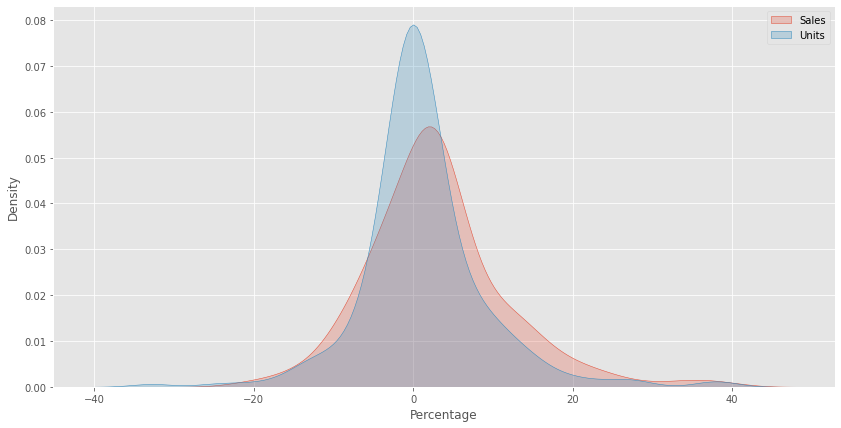

In [18]:
plt.figure(figsize=(14,7))
sns.kdeplot(df250['YOY_Sales'].values, shade = True)
sns.kdeplot(df250['YOY_Units'].values, shade = True)
plt.legend(['Sales','Units'])
plt.xlabel('Percentage')
#These Distributions shows us that year on year sales percentage no more than 40%

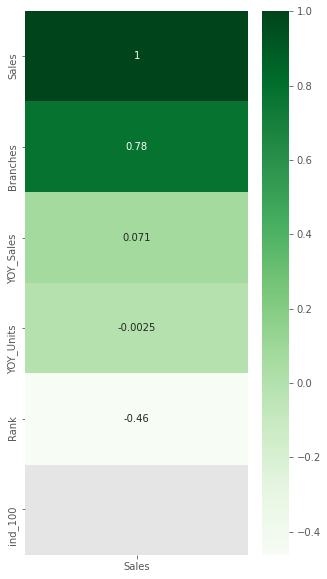

In [19]:
#Sales High Correlated with Branches
corr = df250.corr().loc[:,['Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Greens")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

In [20]:
#Sales Indicator
plt.figure(figsize=(14,7));
Platform = df250['Sales_year'].value_counts(sort = True).index
Count = df250['Sales_year'].value_counts(sort = True)
fig = px.pie(names = Platform,
             values = Count,
             title='Positive - Negative')
fig.update_traces(textposition='inside', textinfo='percent+label')

#Although the restaurants were on the best list during the year, about 35% of restaurants had negative indicators

<Figure size 1008x504 with 0 Axes>

In [21]:
plt.figure(figsize=(40,40));
df = px.data.tips()
fig = px.sunburst(df250, path=['category', 'sub_category'], values='Sales')
fig.show()
#sunburst shows that quick-service subcategory always get high sales

<Figure size 2880x2880 with 0 Axes>

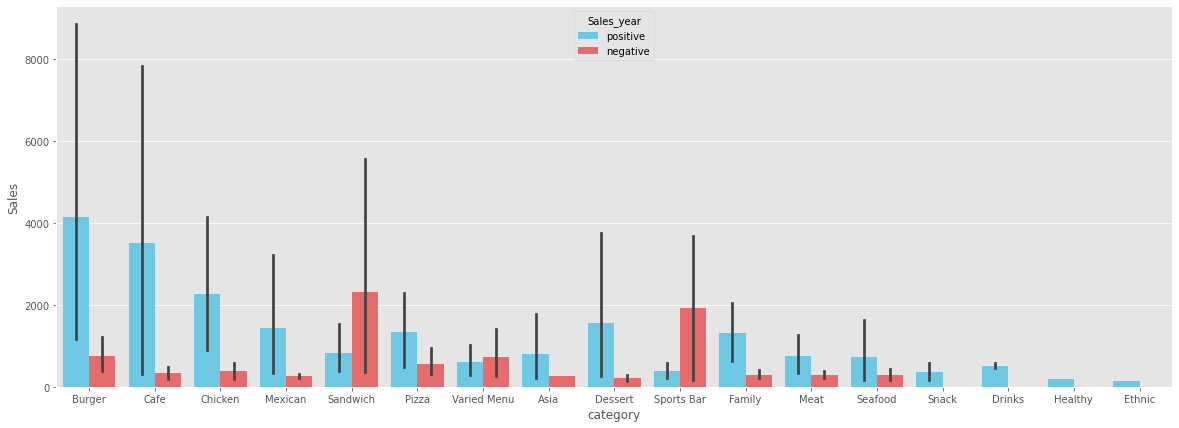

In [25]:
plt.figure(figsize=(20,7))
pal = ["#58D3F7","#FA5858"]
sns.barplot(data=df250,x=df250['category'],y=df250['Sales'],hue=df250['Sales_year'],palette=pal);
#varied menu, sandwiches and sports bar had negative indicators more than positive

In [26]:
#Top Resturants In Best Category
pizza = df250.query("category == 'Pizza'")[:10]

fig = px.bar(pizza,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Viridis',
             title='Pizza Sales Top Restaurants')
fig.show()

In [27]:
Burger = df250.query("category == 'Burger'")[:10]

fig = px.bar(Burger,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='BlackBody',
             title='Burger Top Restaurants')
fig.show()

In [28]:
VariedMenu = df250.query("category == 'Varied Menu'")[:10]

fig = px.bar(VariedMenu,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Plotly3',
             title='VariedMenu Top Restaurants')
fig.show()

In [29]:
Family = df250.query("category == 'Family'")[:10]

fig = px.bar(Family,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Turbo',
             title='Family Top Restaurants')
fig.show()

In [30]:
Meat = df250.query("category == 'Meat'")[:10]

fig = px.bar(Meat,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Jet',
             title='Meat Top Restaurants')
fig.show()

In [31]:
Mexican = df250.query("category == 'Mexican'")[:10]

fig = px.bar(Mexican,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Aggrnyl',
             title='Mexican Top Restaurants')
fig.show()

In [32]:
Cafe = df250.query("category == 'Cafe'")[:10]

fig = px.bar(Cafe,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Darkmint',
             title='Cafe Top Restaurants')
fig.show()

In [33]:
Sandwich = df250.query("category == 'Sandwich'")[:10]

fig = px.bar(Sandwich,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Magenta',
             title='Sandwich Top Restaurants')
fig.show()

In [34]:
Chicken = df250.query("category == 'Chicken'")[:10]

fig = px.bar(Chicken,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Brwnyl',
             title='Chicken Top Restaurants')
fig.show()

In [36]:
Drinks = df250.query("category == 'Drinks'")[:10]

fig = px.bar(Drinks,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='thermal',
             title='Drinks Top Restaurants')
fig.show()

#Top 50 Future Restaurants

In [37]:
df_f.head(10)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [38]:
Platform = df_f['Franchising'].value_counts(sort = True).index
Count = df_f['Franchising'].value_counts(sort = True)
fig = px.pie(names = Platform,
             values = Count,
             title='Franchising Or Not')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [39]:
df_f['YOY_Sales']=df_f['YOY_Sales'].apply(lambda x:x.replace('%',''))
df_f['YOY_Sales']= pd.to_numeric(df_f['YOY_Sales'])
franch = df_f.groupby('Franchising',as_index=False).agg({'YOY_Sales':'sum'})
fig = px.bar(franch,
             x='Franchising',
             y='YOY_Sales',
             color='YOY_Sales',
             color_continuous_scale='thermal',
             title='Franchising Or not')
fig.show()

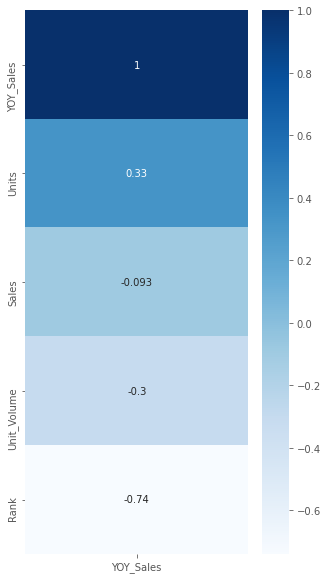

In [40]:
corr = df_f.corr().loc[:,['YOY_Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['YOY_Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Blues")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()